In [1]:
library(Seurat)
library(SeuratWrappers)
library(harmony)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

Attaching SeuratObject

Le chargement a nécessité le package : Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width=20, repr.plot.height=20) # To set the figure size in Jupyter

In [3]:
embryos<-readRDS("/home/adufour/work/rds_storage/all_cells/all_embryos.rds")

In [4]:
embryos <- NormalizeData(embryos) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)
embryos.integrated <- RunHarmony(embryos, group.by.vars = "SAMP")

Centering and scaling data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


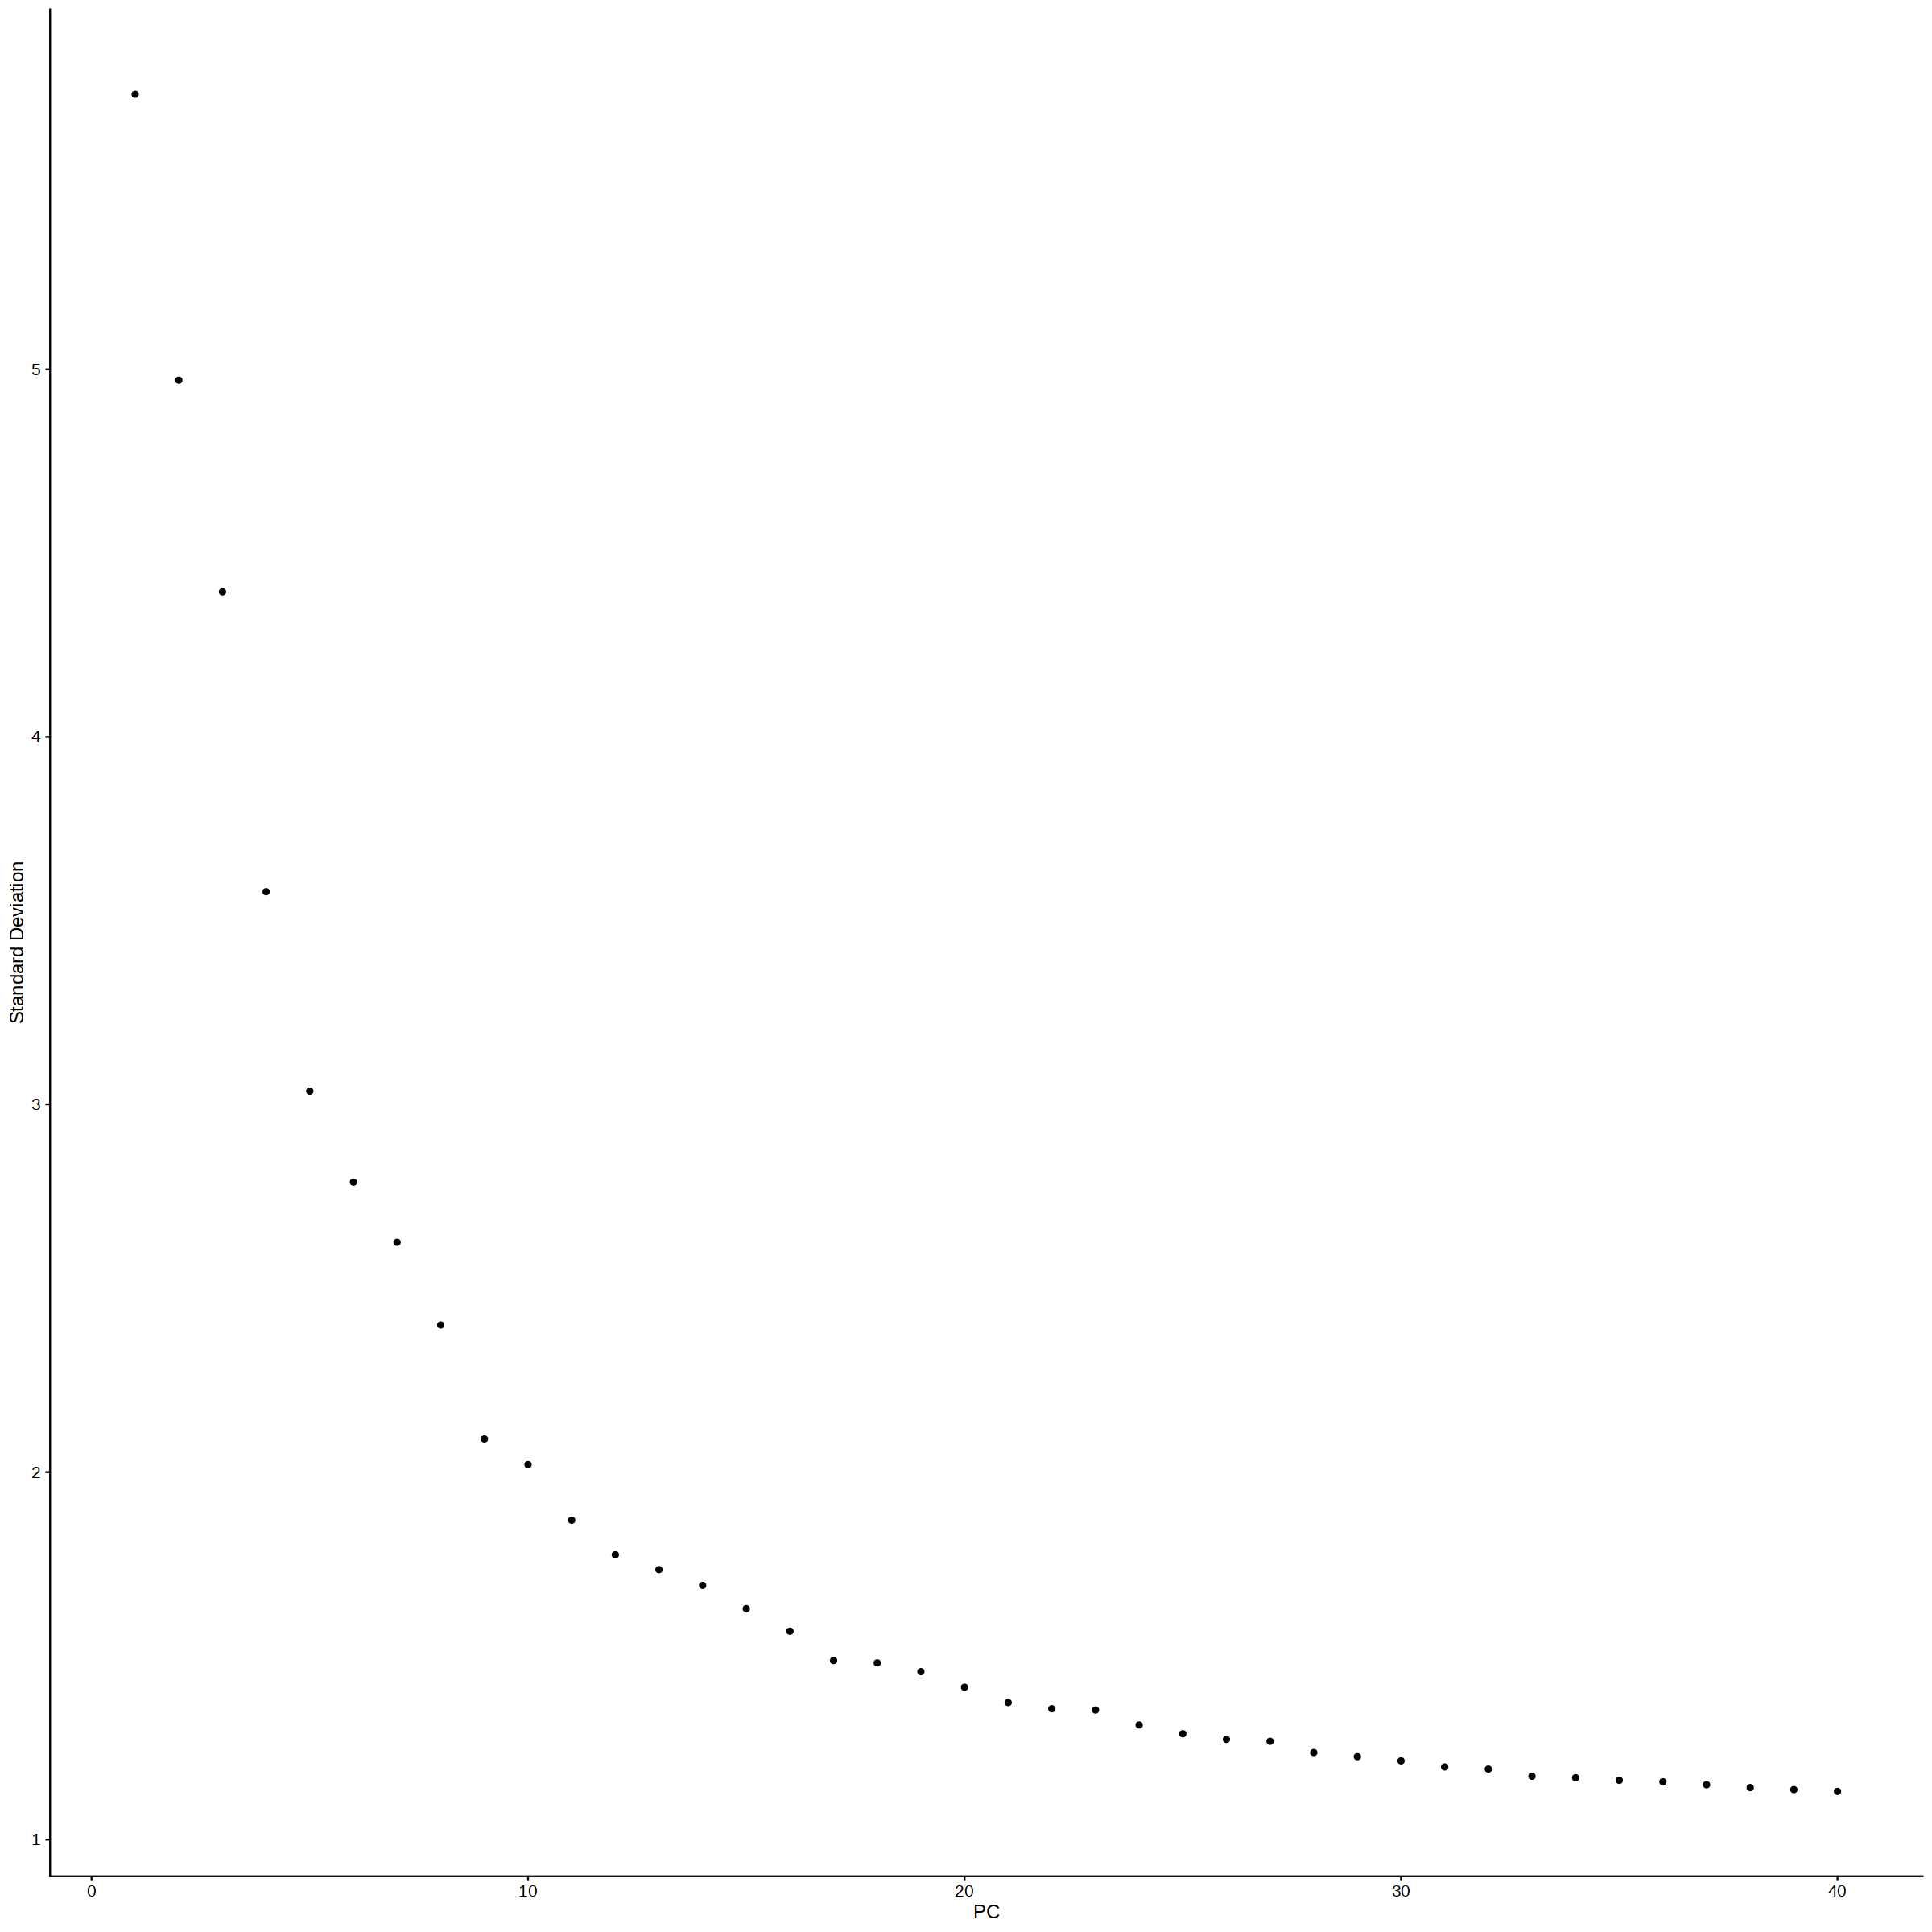

In [5]:
ElbowPlot(embryos.integrated, ndims = 40)

In [6]:
embryos.integrated <- RunUMAP(embryos.integrated, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:36:11 UMAP embedding parameters a = 0.9922 b = 1.112

10:36:11 Read 34888 rows and found 30 numeric columns

10:36:11 Using Annoy for neighbor search, n_neighbors = 30

10:36:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:36:16 Writing NN index file to temp file /tmp/Rtmp8FIQw6/file5a9769a9f7cb

10:36:16 Searching Annoy index using 1 thread, search_k = 3000

10:36:28 Annoy recall = 100%

10:36:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [7]:
embryos.integrated <- FindNeighbors(embryos.integrated, reduction = "harmony", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [8]:
embryos.integrated <- FindClusters(embryos.integrated, resolution = 0.05)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34888
Number of edges: 1206604

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9773
Number of communities: 6
Elapsed time: 9 seconds


In [9]:
Idents(embryos.integrated) <- "cell_type"

In [10]:
embryos.integrated$cell_type_time <- paste(embryos.integrated@meta.data$cell_type, embryos.integrated@meta.data$TIME, sep = "_")

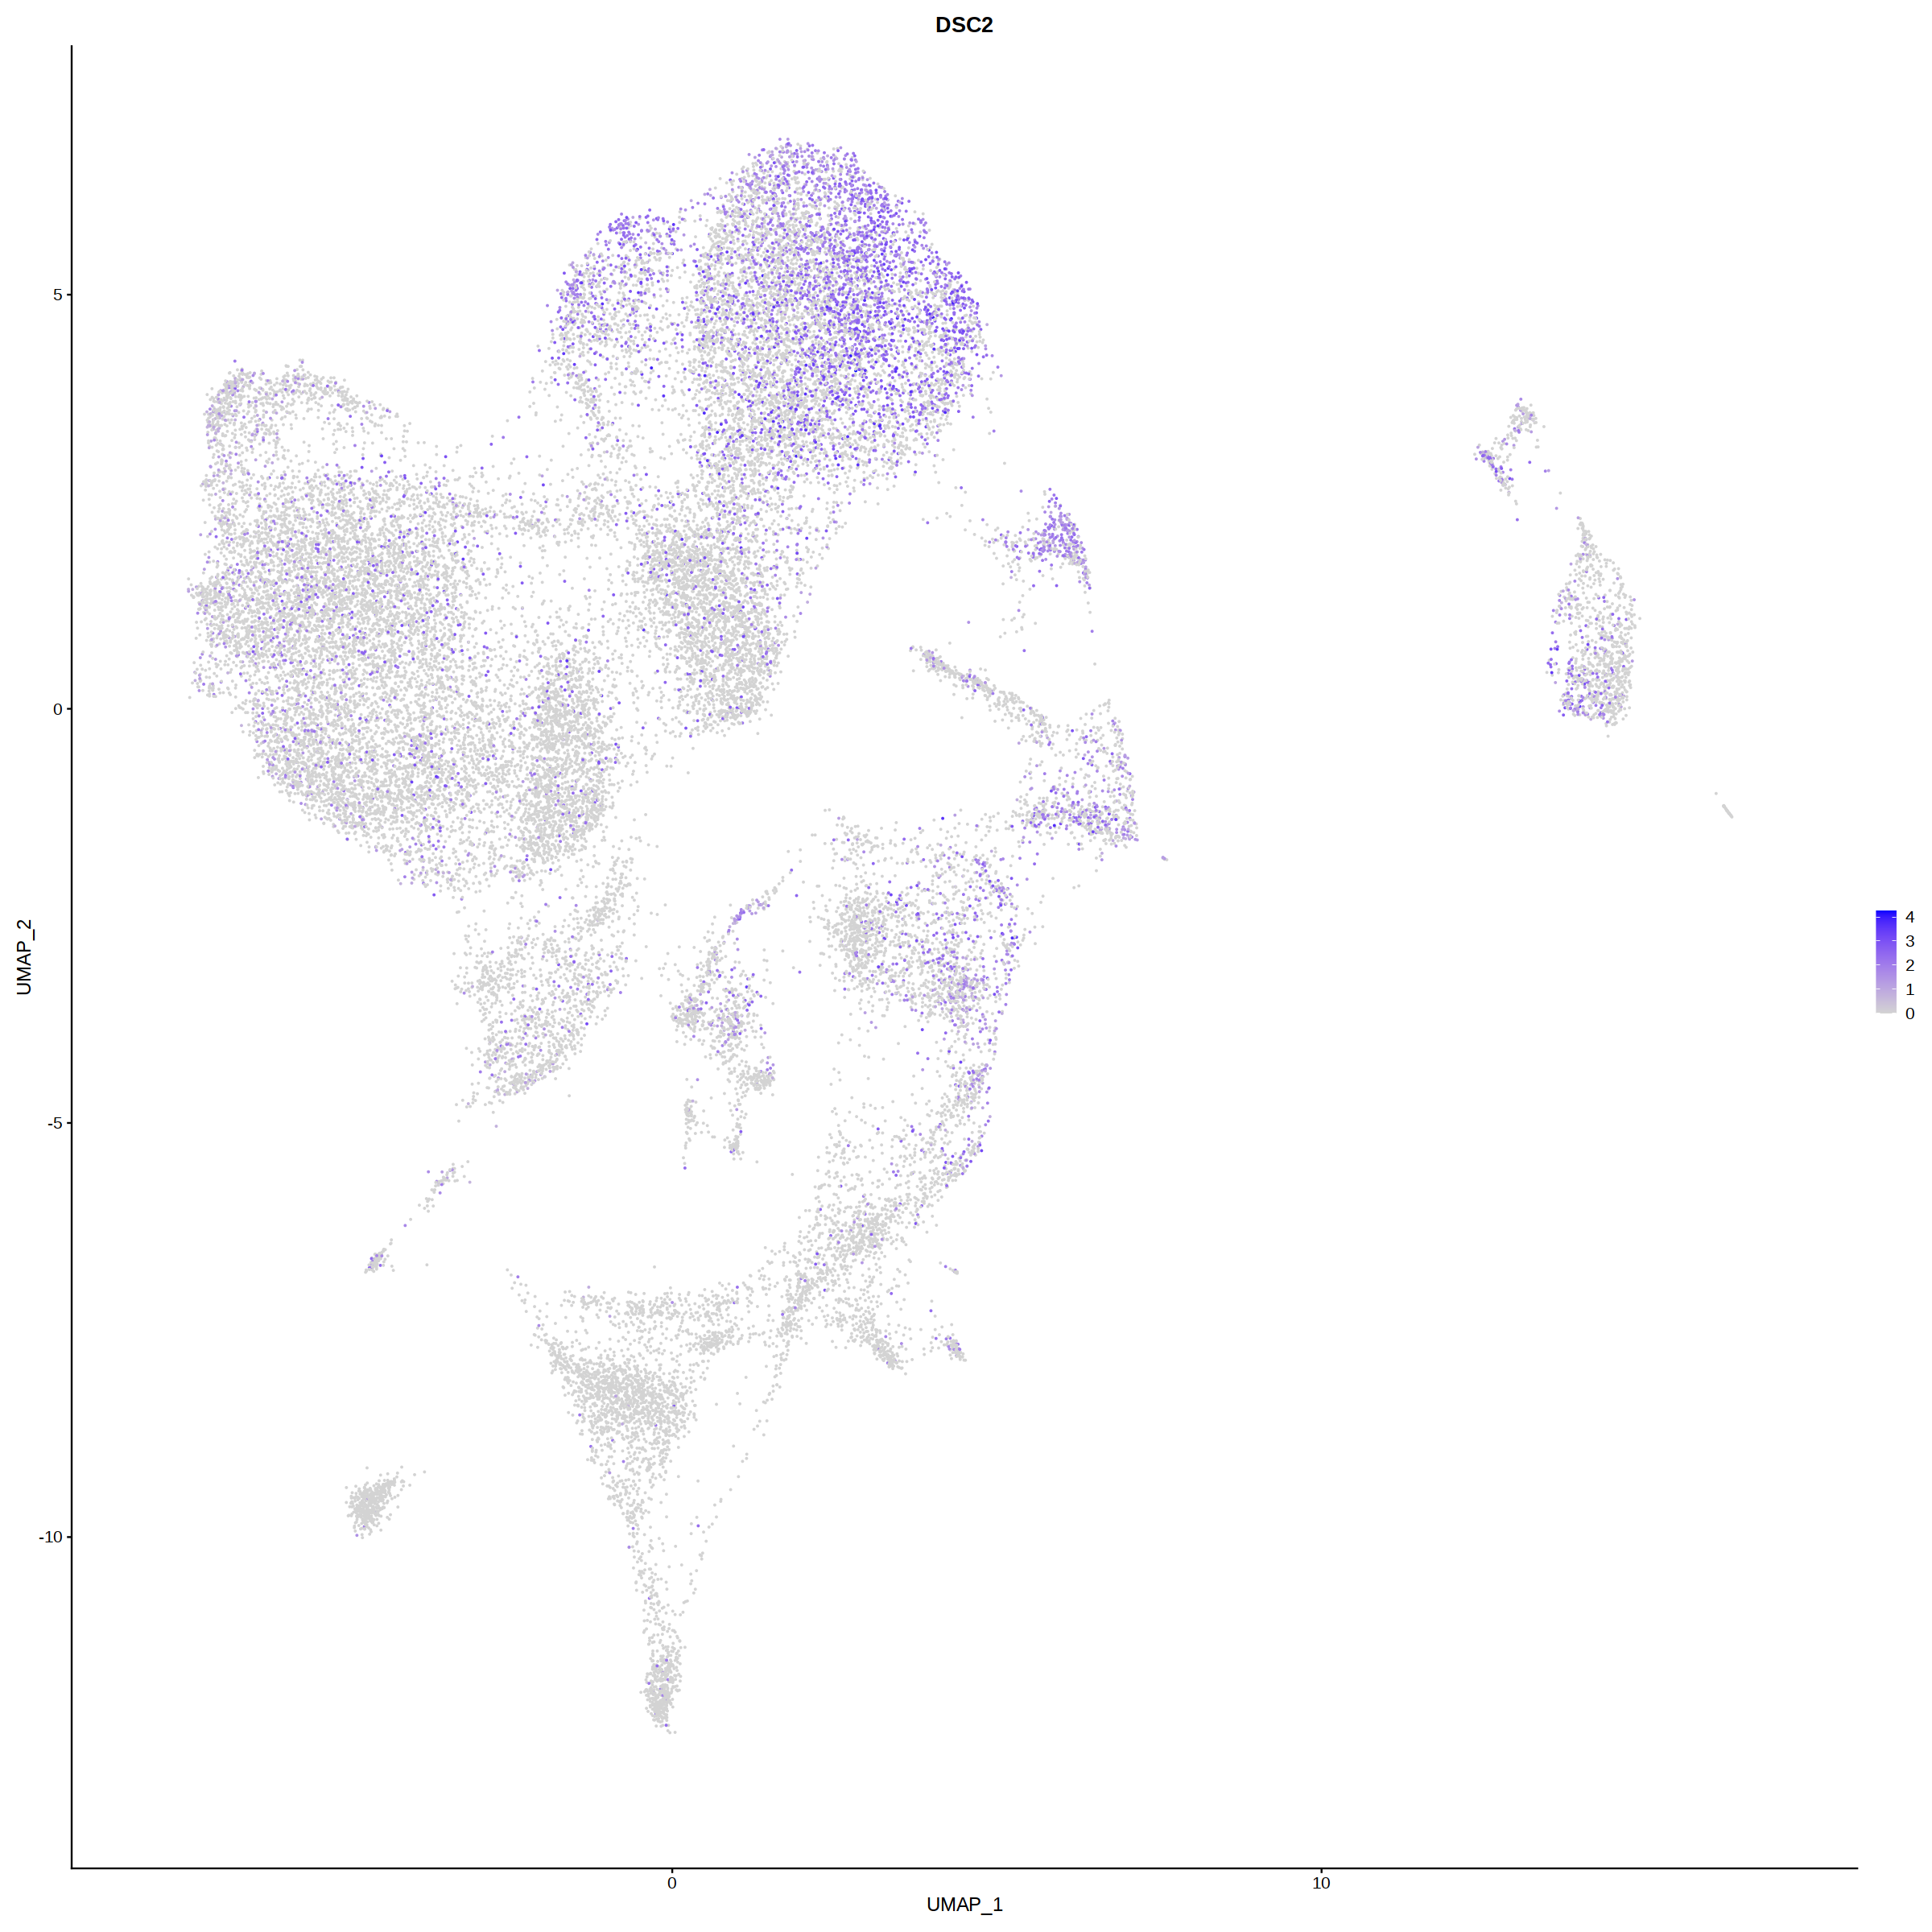

In [11]:
FeaturePlot(embryos.integrated, "DSC2")

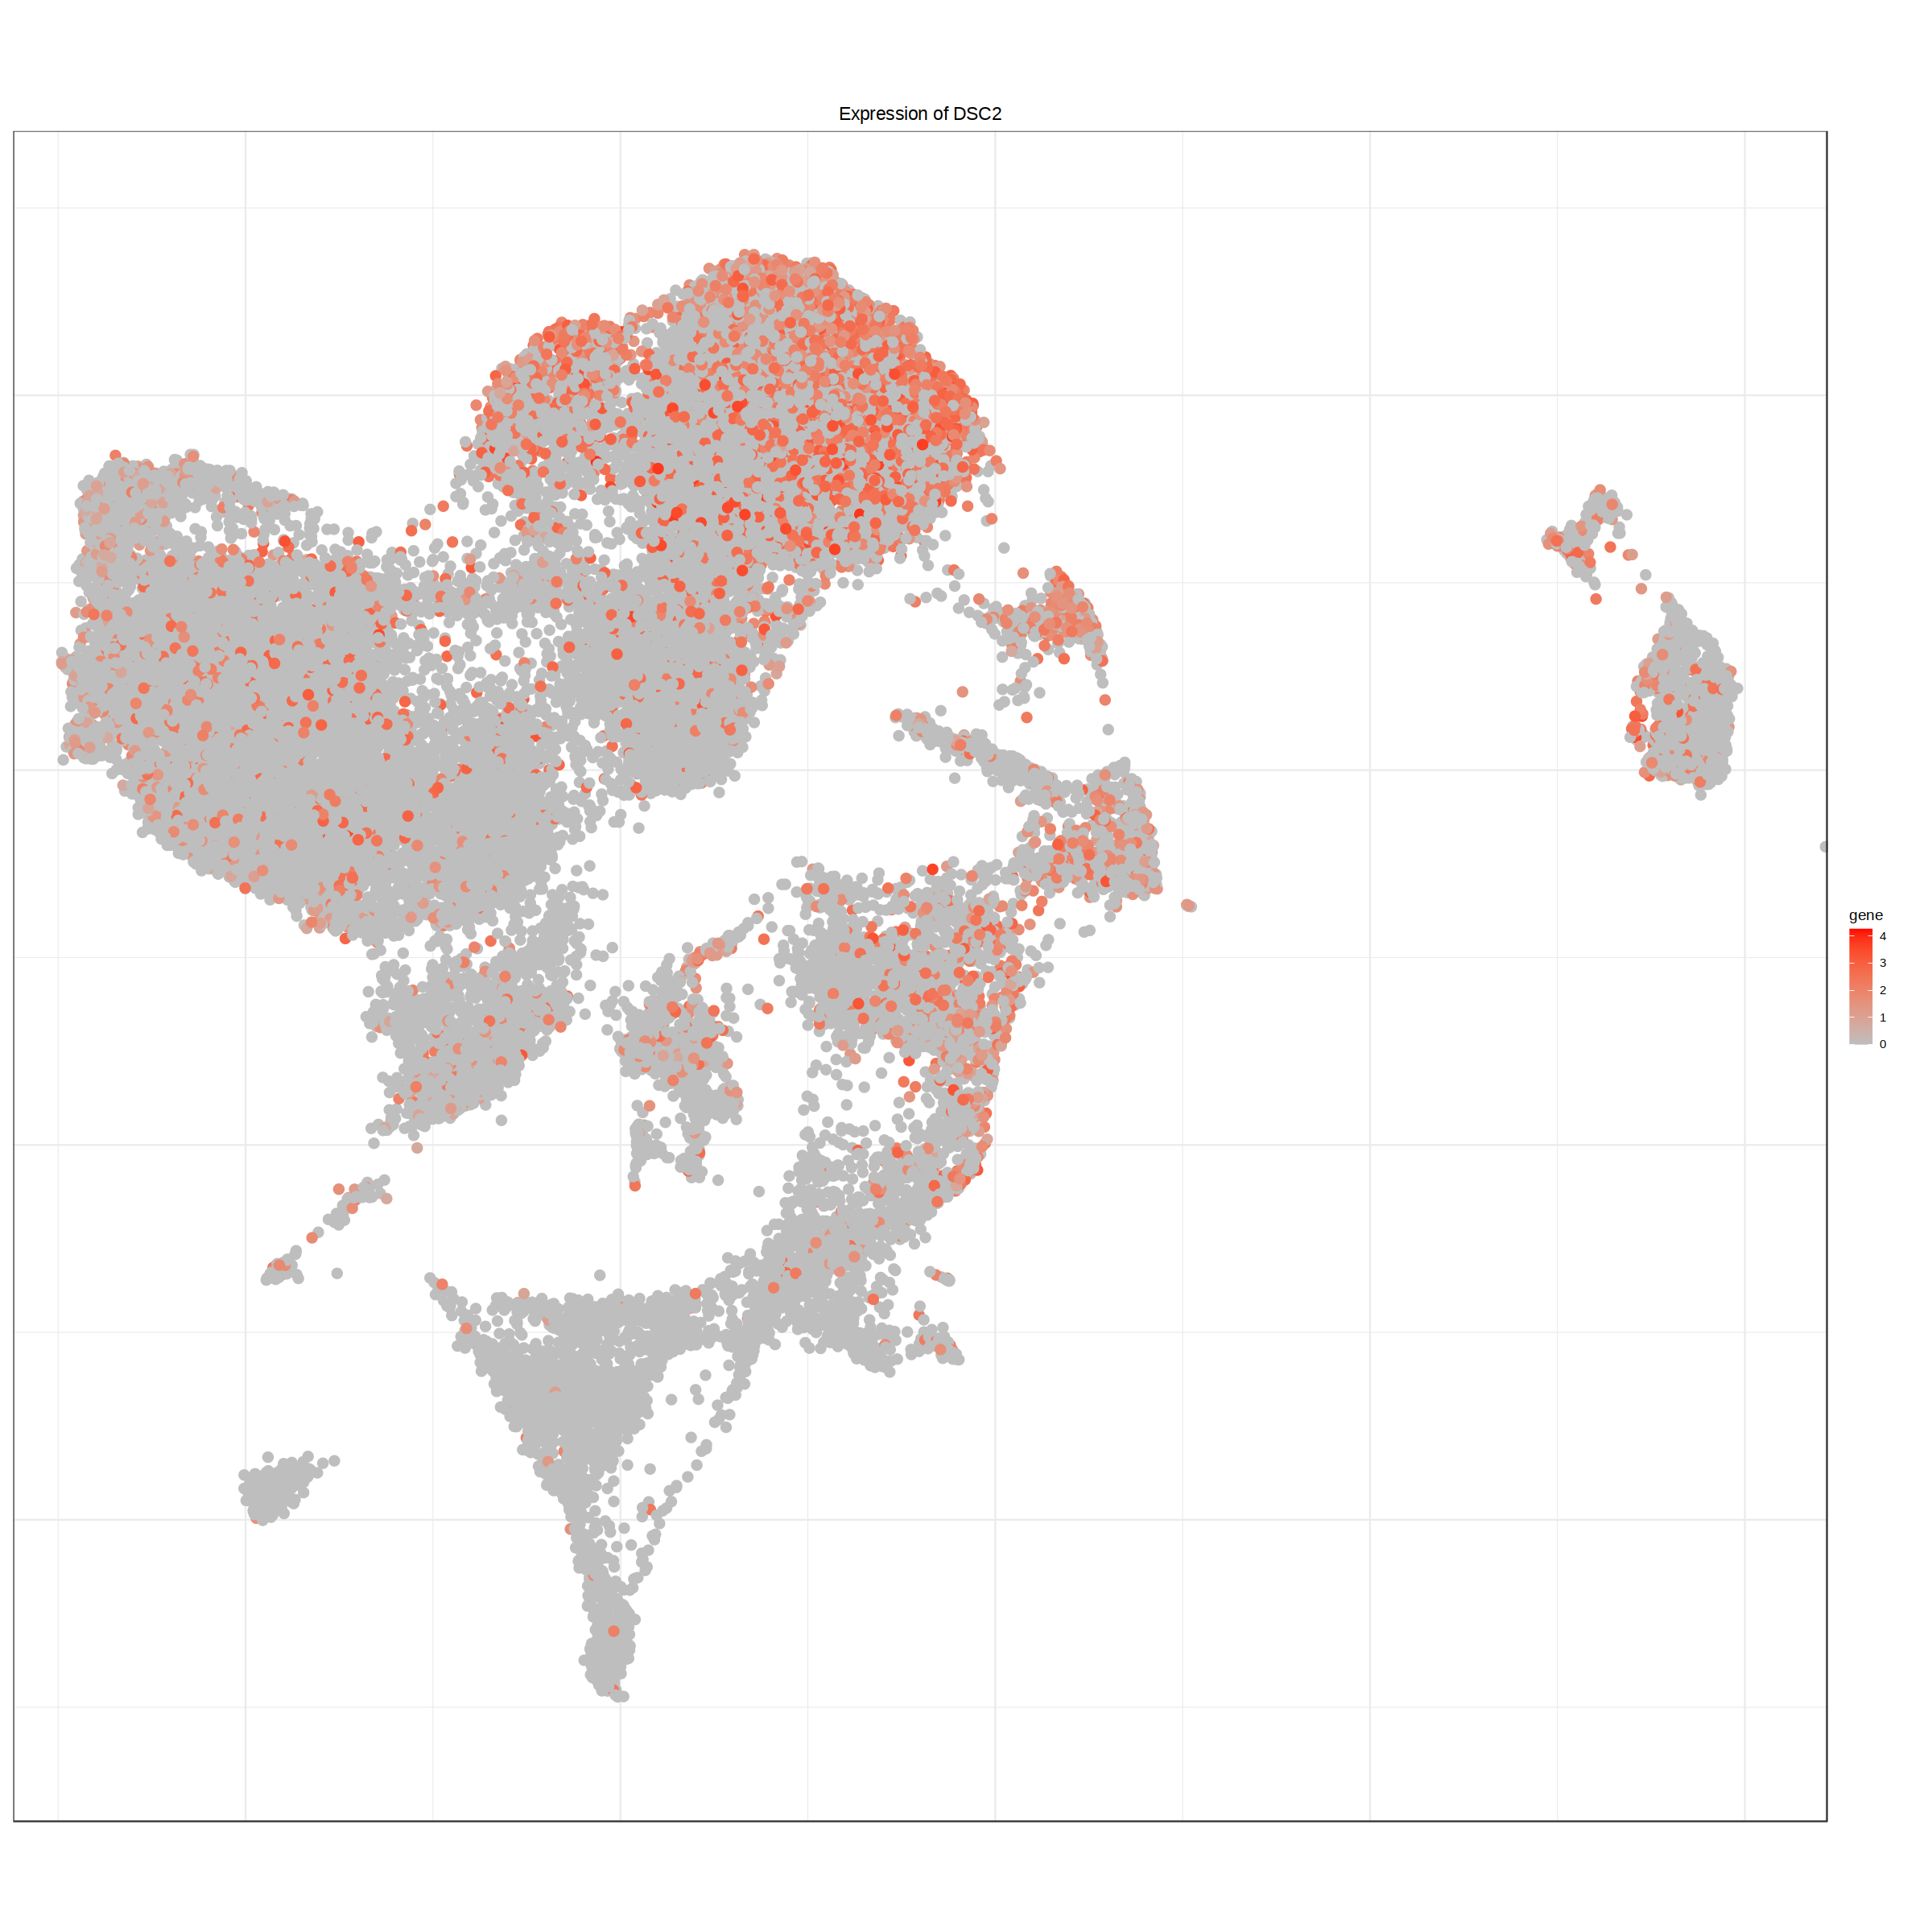

In [12]:
gene <- "DSC2"
gene_table <- bind_cols(embryos.integrated@meta.data, as.data.frame(embryos.integrated@reductions$umap@cell.embeddings), as.data.frame(FetchData(embryos.integrated, vars = gene))) %>%
  dplyr::rename(gene = length(colnames(.)))

plot <- gene_table %>%
  ggplot(aes(UMAP_1, UMAP_2, color = gene)) +
  geom_point(size = 3) +
  theme_bw() +
  theme(plot.margin = unit(c(0.25,1,0.25,0.25), "cm"),
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = 0.5)) +
  scale_color_gradient(low = "grey", high = "red") +
  ggtitle(paste0("Expression of ", gene)) +
  coord_fixed(xlim = c(-7, 15), ylim = c(-13, 7.5))

plot

In [13]:
ggsave(
  paste0("/home/adufour/work/notebook/plots/features/UMAP_", gene, ".svg"),
  plot,
  height = 18,
  width = 20
)